# Binary Classification using Logistic Regression
Name: Ankit Saha\
Roll number: AI21BTECH11004

Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset file

In [2]:
df = pd.read_csv('Epoch Hackathon - Dataset.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,8.680,4.3400,0.778,26.800000,0.8290
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,8.560,4.2800,0.742,36.000000,0.7440
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,11.480,5.7400,0.655,35.294118,0.7195
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,8.100,4.0500,0.636,30.909091,0.6080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,6.800,3.4000,0.670,13.750000,0.6610
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6.450,3.2250,0.822,13.076923,0.7110
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6.810,3.4050,0.826,13.793103,0.7540
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,6.545,3.2725,0.785,13.750000,0.6615


In [3]:
total_count = len(df)
print(f'Size of the data set = {total_count}\n')

Size of the data set = 1599



In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,k_value,l_value,m_value,percentage_free_sulphur,n_value
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709,8.847458,4.423729,0.745615,32.421241,0.859570
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950,1.704047,0.852023,0.192020,22.016181,0.432661
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000,5.120000,2.560000,0.388000,11.666667,0.368500
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000,7.680000,3.840000,0.631000,20.625000,0.657750
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000,8.445000,4.222500,0.702000,26.666667,0.754000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000,9.740000,4.870000,0.815000,38.571429,0.893750
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000,16.285000,8.142500,2.610000,440.000000,4.801000


In [5]:
(df.describe())['quality']

count    1599.000000
mean        0.534709
std         0.498950
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: quality, dtype: float64

### Exploratory Data Analysis

Finding the distibution of good and bad quality wines

In [6]:
good_count = np.sum(df['quality'])
bad_count = total_count - good_count
print(f"Number of good quality wines = {good_count}")
print(f"Number of bad quality wines = {bad_count}")
print(f"Good : Bad = {np.around(good_count * 100 / total_count, 3)}% : {np.around(bad_count * 100 / total_count, 3)}%\n")

Number of good quality wines = 855
Number of bad quality wines = 744
Good : Bad = 53.471% : 46.529%



Plotting scatter plots and histograms to visualize the pairwise relations between sets of 4 variables at a time and our target variable 'quality'

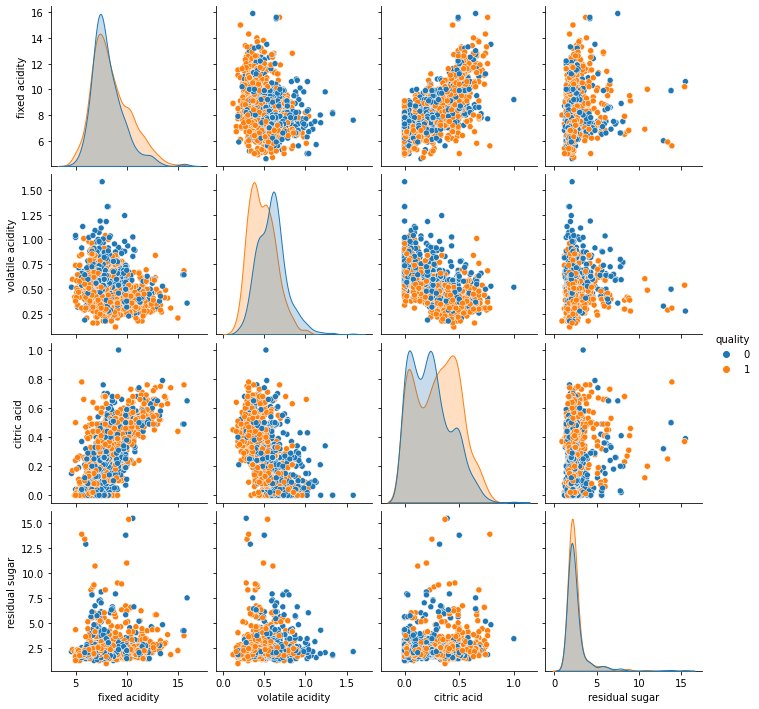

In [7]:
ls1 = list(df)[:4]
ls1.append('quality')
sc1 = sns.pairplot(df.loc[:, ls1], hue='quality')

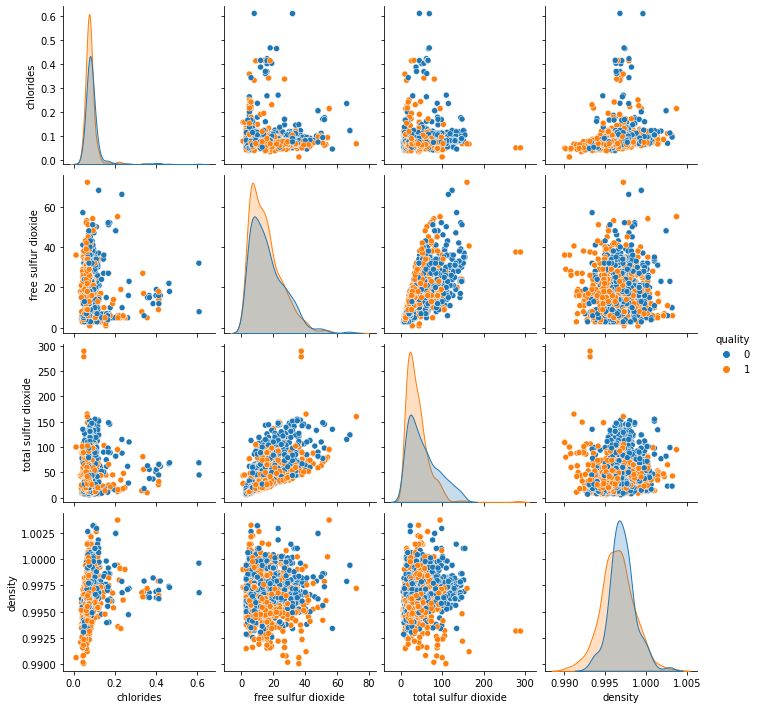

In [8]:
ls2 = list(df)[4:8]
ls2.append('quality')
sc2 = sns.pairplot(df.loc[:, ls2], hue='quality')

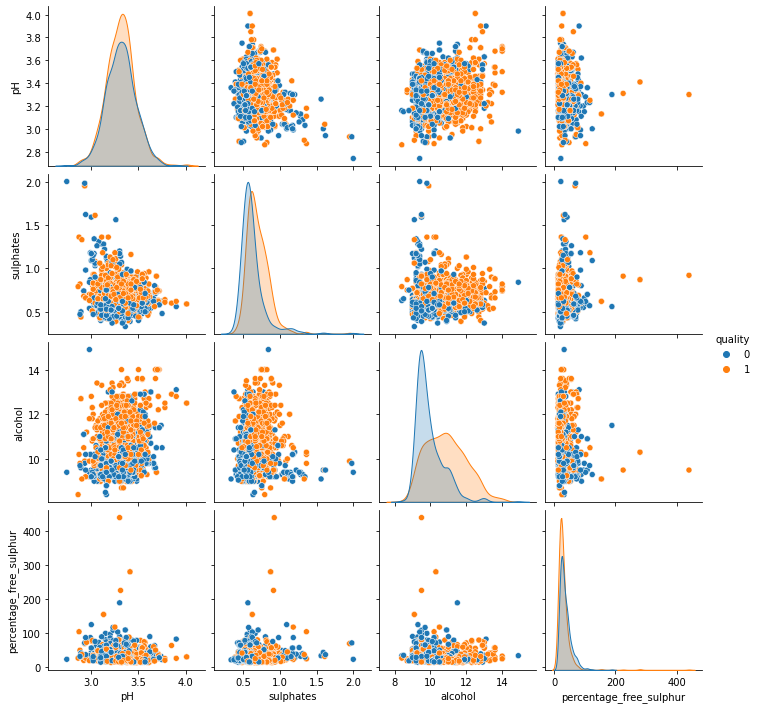

In [9]:
ls3 = ['pH', 'sulphates', 'alcohol', 'percentage_free_sulphur', 'quality']
sc3 = sns.pairplot(df.loc[:, ls3], hue='quality')

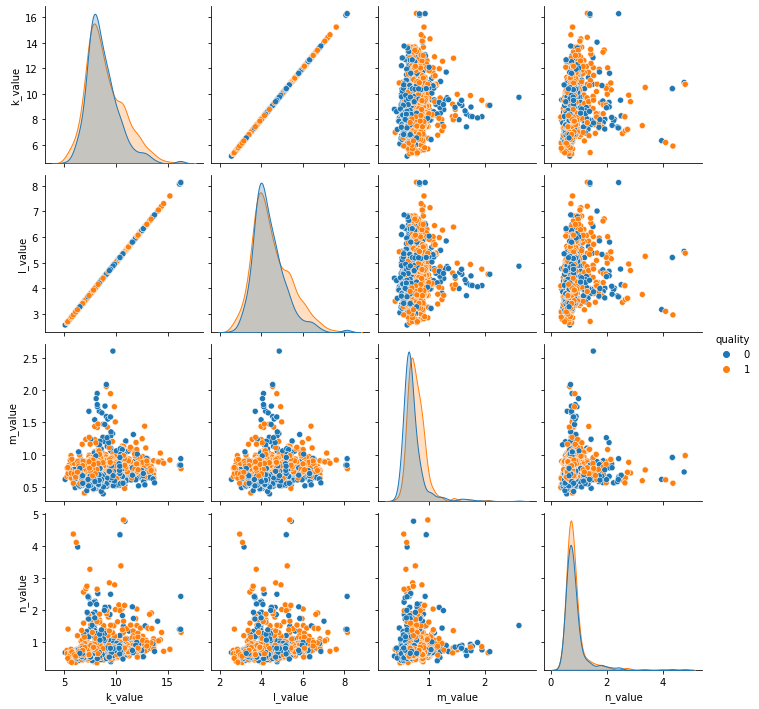

In [10]:
ls4 = ['k_value', 'l_value', 'm_value', 'n_value', 'quality']
sc4 = sns.pairplot(df.loc[:, ls4], hue='quality')

From the graph, k_value is a linear function (twice) of l_value

Plotting a correlation heatmap to identify relations between the variables

<AxesSubplot:>

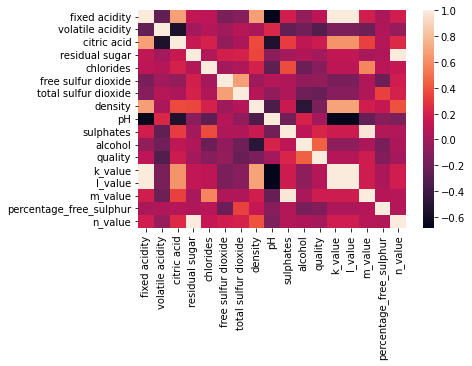

In [11]:
sns.heatmap(df.corr())

From the heatmap, we see a strong correlation between the following:
- (fixed acidity, k_value) 
- (fixed acidity, l_value)
- (k_value, l_value)
- (residual sugar, n_value)
- (sulphates, m_value)

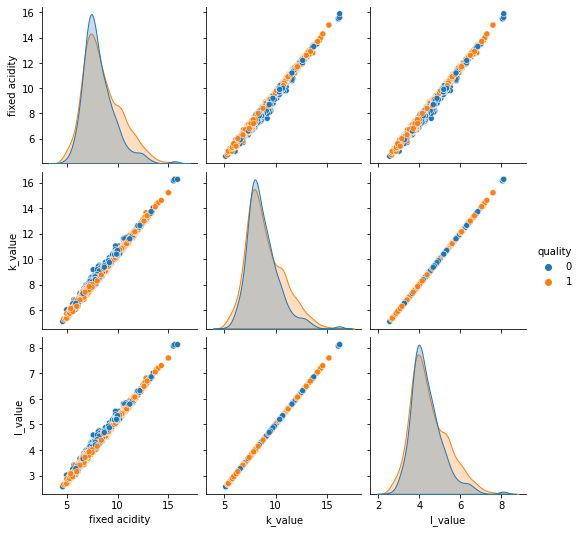

In [12]:
ls5 = ['fixed acidity', 'k_value', 'l_value', 'quality']
sc5 = sns.pairplot(df.loc[:, ls5], hue='quality')

k_value vs l_value

In [13]:
(df['k_value'] / df['l_value']).describe()

count    1599.0
mean        2.0
std         0.0
min         2.0
25%         2.0
50%         2.0
75%         2.0
max         2.0
dtype: float64

fixed acidity vs k_value

In [14]:
(df['fixed acidity'] / df['k_value']).describe()

count    1599.000000
mean        0.937804
std         0.024554
min         0.827815
25%         0.920971
50%         0.938362
75%         0.957811
max         0.986696
dtype: float64

fixed acidity vs l_value

In [15]:
(df['fixed acidity'] / df['l_value']).describe()

count    1599.000000
mean        1.875608
std         0.049107
min         1.655629
25%         1.841942
50%         1.876725
75%         1.915621
max         1.973392
dtype: float64

As the above standard deviations are very low, we can infer that the ratios of these quantities are nearly constant

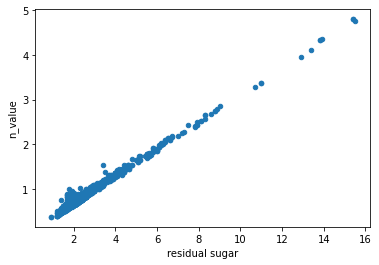

In [16]:
sc6 = df.plot(kind='scatter', x='residual sugar', y='n_value')

residual sugar vs n_value

In [17]:
(df['residual sugar'] / df['n_value']).describe()

count    1599.000000
mean        2.928483
std         0.192797
min         1.804511
25%         2.822723
50%         2.941176
75%         3.081053
max         3.271671
dtype: float64

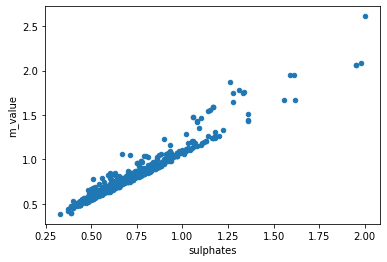

In [18]:
sc7 = df.plot(kind='scatter', x='sulphates', y='m_value')

sulphates vs m_value

In [19]:
(df['sulphates'] / df['m_value']).describe()

count    1599.000000
mean        0.882278
std         0.038029
min         0.633869
25%         0.865197
50%         0.886263
75%         0.905350
max         0.970149
dtype: float64

Thus, these are all approximately linear functions of each other

### Feature Engineering

Since k_value, l_value, m_value, n_value all have other variables that they are strongly correlated with, we can drop them from our data

In [20]:
df = df.drop(columns=['k_value', 'l_value', 'm_value', 'n_value'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,percentage_free_sulphur
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,30.909091
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,26.800000
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,36.000000
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,35.294118
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,30.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,13.750000
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,13.076923
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,13.793103
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,13.750000


### Training the model

Splitting the dataset into training and testing sets (80:20)

In [21]:
training_indices = random.sample(range(total_count), int(0.8 * total_count))
test_indices = [i for i in range(total_count) if i not in training_indices]
training_set = df.iloc[training_indices].drop(columns='quality')
test_set = df.iloc[test_indices].drop(columns='quality')
training_labels = df.iloc[training_indices]['quality']
test_labels = df.iloc[test_indices]['quality']
print(f'Size of the training data set = {len(training_set)}')
print(f'Size of the test data set = {len(test_set)}')

Size of the training data set = 1279
Size of the test data set = 320


We now define several functions that we are going to use for logistic regression

In [22]:
def sigmoid(z):
    """ Returns the sigmoid of z, i.e., 1/(1 + exp(-z)) """
    return 1 / (1 + np.exp(-z))

In [23]:
def minus_log_likelihood(X, y, W):
    """ Returns the (negative of the log-likelihood function) which is to be minimized
    :param X: Input vector
    :param y: Labels
    :param W: Weight vector
    """
    z = np.dot(X, W)
    J = np.sum(y * -np.log1p(np.exp(-z)) + (1 - y) * -np.log1p(np.exp(z))) / len(X) 
    # log1p is being used for precision reasons when exp(-z) or exp(z) is very small
    return -J

In [24]:
def gradient(X, y, W):
    """ Returns the gradient of the log-likelihood function with parameters X, y, W """
    z = np.dot(X, W)
    return np.dot(X.T, sigmoid(z) - y) / len(X)

In [25]:
def steepest_descent(X, y):
    """ Returns the weight vector obtained after training the model """
    W = np.zeros(len(X.columns)) # Initial guess
    epsilon = 1e-6 # To check if norm(grad(W)) has obtained stability
    step_size = 1e-2 # To determine how much to reduce our guess by at each iteration
    g_prev = gradient(X, y, W)
    W -= step_size * g_prev
    g_curr = gradient(X, y, W)

    while (abs(np.linalg.norm(g_curr) - np.linalg.norm(g_prev)) > epsilon): 
        # Keep repeating until the gradient is sufficiently small (approaches zero => minima)
        g_prev = g_curr
        W -= step_size * g_curr
        g_curr = gradient(X, y, W)

    return W

Performing logistic regression on our training data set to get the weight vector

In [26]:
weight_vector = steepest_descent(training_set, training_labels)
weight_vector

array([-0.17996869, -2.44324409,  1.09127652, -0.23895319, -0.25445023,
        0.41914955, -0.15201616, -0.95548838, -3.41878895,  0.89440608,
        1.7270293 ,  0.0925384 ])

### Testing and Evaluation

Testing the model on the test data set

In [27]:
predicted_output = np.dot(test_set, weight_vector)
predicted_labels = []
for output in predicted_output:
    if (sigmoid(output) >= 0.5):
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)

Evaluating the model

In [28]:
TP = 0 # True positives
FP = 0 # False positives
TN = 0 # True negatives
FN = 0 # False negatives

In [29]:
for i in range(len(test_labels)):
    if test_labels.iloc[i] and predicted_labels[i]:
        TP += 1
    elif not test_labels.iloc[i] and predicted_labels[i]:
        FP += 1
    elif not test_labels.iloc[i] and not predicted_labels[i]:
        TN += 1
    else:
        FN += 1

In [30]:
print(TP, FP, TN, FN)
print(f'\nAccuracy = {(TP + TN) / len(test_labels)}')
print(f'Precision = {TP / (TP + FP)}')
print(f'Recall/Sensitivity = {TP / (TP + FN)}')
print(f'Specificity = {TN / (TN + FP)}')

172 124 21 3

Accuracy = 0.603125
Precision = 0.581081081081081
Recall/Sensitivity = 0.9828571428571429
Specificity = 0.14482758620689656


We observe that our model's predictions are overwhelmingly positive for both positive and negative samples, which is evident by the high recall and low specificity